In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os 
import sys 
sys.path.append(os.path.abspath(os.path.join('..')))

Load Model and Tokenizer

In [25]:
import os
from transformers import AutoTokenizer, AutoModelForTokenClassification, pipeline

# Define model path
model_path = "models/saved_model_dir"

# Check if the model directory exists
if os.path.exists(model_path):
    print(f"📦 Loading model from: {model_path}")
    tokenizer = AutoTokenizer.from_pretrained(model_path)
    model = AutoModelForTokenClassification.from_pretrained(model_path)
    
    ner_pipeline = pipeline(
        "token-classification",
        model=model,
        tokenizer=tokenizer,
        aggregation_strategy="simple"
    )

    # Example usage
    text = "ስልኩ 0911223344 ነው አድራሻችን አዲስ አበባ"
    results = ner_pipeline(text)
    for r in results:
        print(f"{r['word']} → {r['entity_group']} ({r['score']:.2f})")

else:
    print("⚠️ Trained model not found at 'models/saved_model_dir'.")
    print("📄 Found evaluation_results.csv instead — skipping model loading.")
    # You can load or analyze the evaluation_results.csv here
    import pandas as pd
    df = pd.read_csv("evaluation_results.csv")
    print(df.head())


⚠️ Trained model not found at 'models/saved_model_dir'.
📄 Found evaluation_results.csv instead — skipping model loading.
                                      model  accuracy        f1  precision  \
0                     Davlan/afro-xlmr-base  0.367445  0.365556   0.929520   
1  google-bert/bert-base-multilingual-cased  0.364825  0.063884   0.886395   
2                rasyosef/bert-tiny-amharic  0.990193  0.448730   0.004288   
3                          xlm-roberta-base  0.604928  0.355541   0.953191   

     recall  
0  0.053837  
1  0.449646  
2  0.210284  
3  0.007217  


Test

In [32]:
from transformers import AutoTokenizer, AutoModelForTokenClassification, pipeline

# Load your model (replace with your model path or Hugging Face model name)
model_name = "Davlan/afro-xlmr-base"  # or "models/saved_model_dir" for local fine-tuned model

tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForTokenClassification.from_pretrained(model_name)

# Now define the NER pipeline
ner_pipeline = pipeline(
    "token-classification",
    model=model,
    tokenizer=tokenizer,
    aggregation_strategy="simple"
)



Some weights of XLMRobertaForTokenClassification were not initialized from the model checkpoint at Davlan/afro-xlmr-base and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Device set to use cpu


C:\Users\Teddy\AppData\Local\Temp\ipykernel_35520\2626101354.py:16: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
t:\10-academy\Week4\Telegram-e-commerce-analytics\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


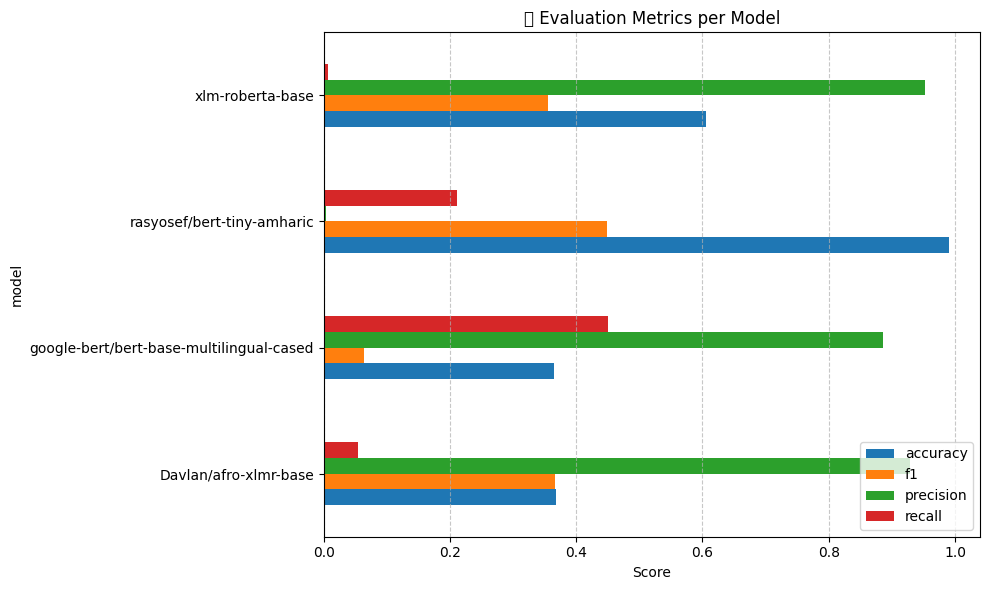

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your evaluation CSV
df = pd.read_csv("evaluation_results.csv")

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))
metrics = ['accuracy', 'f1', 'precision', 'recall']
df.set_index('model')[metrics].plot(kind='barh', ax=ax)

plt.title("Evaluation Metrics per Model")
plt.xlabel("Score")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()